# Experiment

This is the initial experiment. We try to train a model on about 600 pictures which we have boxed and check the results. In the end I want a learner with the following properties. 
 - being able to freeze all layers except the last few ones
 - have a metric which shows me how good I am at labeling
 
 
 Test wether transforms work as expected. Maybe we can write a test function.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# add path so that we can call the modules
import sys
sys.path.append('../')

In [3]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as patheffects
import cv2
from src.models.learner import LearnFastRCNN
from src.data.jsonl_data_reader import LABELS
from src.data.jsonl_dataloader import get_dataloader

## paths

In [4]:
!pwd

/home/wilhelm/research/pytorch_faster_r-cnn/notebooks


In [5]:
path_data = pathlib.Path('../data/interim/poo_detection_01.jsonl')
print(path_data)

../data/interim/poo_detection_01.jsonl


## look at the data

In [36]:
[data_loader, data_loader_test] = get_dataloader(str(path_data), batch_size_train=10, transform_train=True)


In [37]:
print(len(data_loader.dataset))
print(len(data_loader_test.dataset))

480
121


In [38]:
item = data_loader.dataset.__getitem__(3)
item

(tensor([[[0.7765, 0.7451, 0.5961,  ..., 0.1176, 0.1647, 0.1804],
          [0.7451, 0.7216, 0.6824,  ..., 0.1961, 0.1529, 0.1490],
          [0.4549, 0.3765, 0.4392,  ..., 0.1176, 0.2314, 0.1137],
          ...,
          [0.5451, 0.6078, 0.8000,  ..., 0.1490, 0.1294, 0.1373],
          [0.6314, 0.6667, 0.7255,  ..., 0.1490, 0.1137, 0.1451],
          [0.5843, 0.6627, 0.7529,  ..., 0.1451, 0.1059, 0.1490]],
 
         [[0.8196, 0.7922, 0.6510,  ..., 0.1137, 0.1608, 0.1686],
          [0.7922, 0.7686, 0.7333,  ..., 0.1922, 0.1490, 0.1373],
          [0.4980, 0.4275, 0.4941,  ..., 0.1137, 0.2275, 0.0980],
          ...,
          [0.5882, 0.6510, 0.8431,  ..., 0.1529, 0.1333, 0.1412],
          [0.6745, 0.7059, 0.7647,  ..., 0.1529, 0.1176, 0.1490],
          [0.6275, 0.6980, 0.7882,  ..., 0.1490, 0.1098, 0.1529]],
 
         [[1.0000, 0.9961, 0.8353,  ..., 0.0941, 0.1412, 0.1490],
          [0.9961, 0.9647, 0.9059,  ..., 0.1765, 0.1294, 0.1176],
          [0.6784, 0.6000, 0.6471,  ...,

Above shows how the data is prepared. We get a tuple consisting of the image, boxes, labels, image_id and iscrowd. Allthough we don't use the iscrowd property.

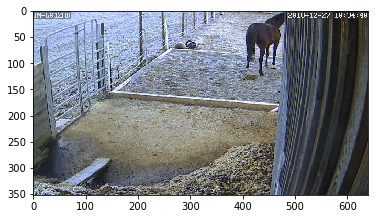

In [39]:
image = LearnFastRCNN.torch_to_numpy_image(item[0])
plt.imshow(image)

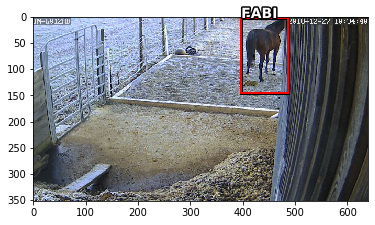

In [40]:
def draw_boundingbox_from_dataset(image, box_coordinates, labels):
    fig,ax = plt.subplots(1)
    
    for box, label in zip(box_coordinates, labels):
        # Display the image
        ax.imshow(image)        
        x1 = box[0]
        y1 = box[1]
        width = box[2] - box[0]
        height = box[3] - box[1]

        
        rect = patches.Rectangle((x1, y1), width, height,linewidth=2,edgecolor='r',facecolor='none')
        rect.set_path_effects([patheffects.Stroke(linewidth=3, foreground='black'), 
                                      patheffects.Normal()])
        ax.add_patch(rect)

        patch = ax.text(x1, y1, label, fontsize=14, color='white', weight='bold')
        patch.set_path_effects([patheffects.Stroke(linewidth=3, foreground='black'), 
                                      patheffects.Normal()])        
        
    plt.show()

image = LearnFastRCNN.torch_to_numpy_image(item[0])
boxes = item[1]['boxes']
labels = [LABELS[label] for label in item[1]['labels'].numpy()]
draw_boundingbox_from_dataset(image, boxes, labels)

## train model

In [41]:
learner = LearnFastRCNN(len(LABELS)+1, data_loader, data_loader_test, device='cuda')

In [42]:
learner.train_one_epoch()

mode=train; loss_box_reg=0.035; loss_classifier=1.736; loss_objectness=0.003
mode=train; loss_box_reg=0.062; loss_classifier=1.744; loss_objectness=0.004
mode=train; loss_box_reg=0.085; loss_classifier=1.692; loss_objectness=0.004
mode=train; loss_box_reg=0.046; loss_classifier=1.526; loss_objectness=0.004
mode=train; loss_box_reg=0.062; loss_classifier=1.262; loss_objectness=0.009
mode=train; loss_box_reg=0.051; loss_classifier=0.905; loss_objectness=0.004
mode=train; loss_box_reg=0.02; loss_classifier=0.527; loss_objectness=0.005
mode=train; loss_box_reg=0.037; loss_classifier=0.278; loss_objectness=0.008
mode=train; loss_box_reg=0.036; loss_classifier=0.131; loss_objectness=0.005
mode=train; loss_box_reg=0.06; loss_classifier=0.123; loss_objectness=0.006
mode=train; loss_box_reg=0.048; loss_classifier=0.088; loss_objectness=0.006
mode=train; loss_box_reg=0.043; loss_classifier=0.082; loss_objectness=0.005
mode=train; loss_box_reg=0.053; loss_classifier=0.127; loss_objectness=0.005
m

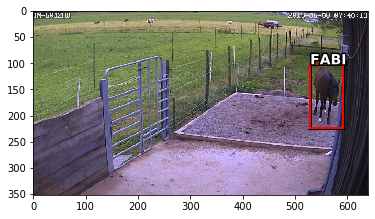

tensor(0.7415, device='cuda:0', grad_fn=<SelectBackward>)
tensor(0.5113, device='cuda:0', grad_fn=<SelectBackward>)
[tensor([520.1924, 112.8865, 590.3209, 219.3714], device='cuda:0',
       grad_fn=<SelectBackward>), tensor([535.6528, 108.1945, 572.4664, 216.3715], device='cuda:0',
       grad_fn=<SelectBackward>)]


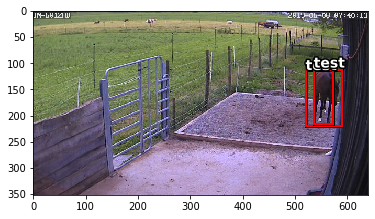

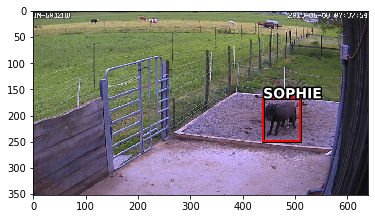

tensor(0.5022, device='cuda:0', grad_fn=<SelectBackward>)
[tensor([427.3766, 178.6215, 509.5796, 233.8760], device='cuda:0',
       grad_fn=<SelectBackward>)]


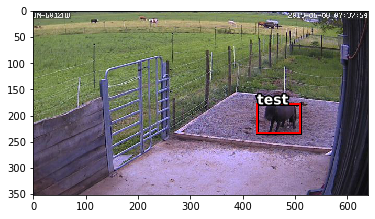

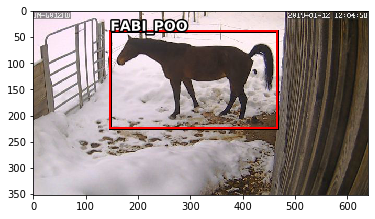

tensor(0.7257, device='cuda:0', grad_fn=<SelectBackward>)
[tensor([122.3570,  47.9739, 436.7211, 227.7501], device='cuda:0',
       grad_fn=<SelectBackward>)]


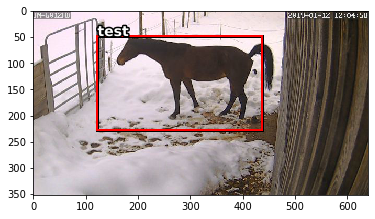

In [43]:
number_of_samples = 3
i = 0
device = 'cuda'
learner.model.eval()
for images, targets in learner.data_loader_test:
    
    
    if i >= number_of_samples:
        break
    
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    images2 = images.copy()
    outputs = learner.model(images2)
    

    for image, target, output in zip(images, targets, outputs):
        if i >= number_of_samples:
            break
        i += 1
        image = learner.torch_to_numpy_image(image)
        labels = [LABELS[label] for label in target['labels'].cpu().numpy()]
        draw_boundingbox_from_dataset(image, target['boxes'], labels)
        
        labels = []
        boxes = []
        for box, label, score in zip(
                output['boxes'],
                output['labels'], 
                output['scores']):
            if score > 0.5:
                print(score)
                labels.append('test')
                boxes.append(box)
        print(boxes)
        draw_boundingbox_from_dataset(image, boxes, labels)
        
        #print(output)